In [118]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
def plot_one_image(image: np.ndarray) -> None:
    fig, axs = plt.subplots(1, 1, figsize=(10, 8))
    
    axs.imshow(image)
    axs.axis('off')
    plt.plot()

### Task 1

In [120]:
def plot_maze_path(image: np.ndarray, coords: tuple) -> np.ndarray:

    if image.ndim != 3:
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        
    img_wpath = image.copy()
    if coords:
        x, y = coords
        img_wpath[x, y, :] = [0, 0, 255]

    return img_wpath

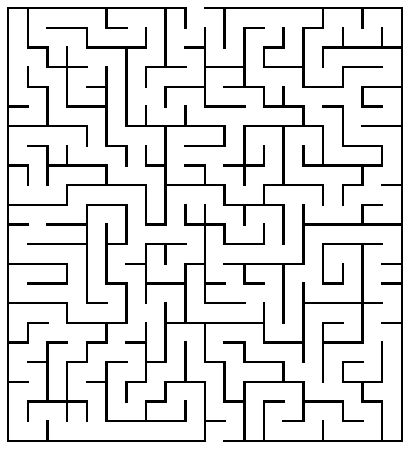

In [203]:
test_image = cv2.imread('Лабиринты/20 by 22 orthogonal maze.png')

plot_one_image(test_image)

In [208]:
def goto(x, y, cur_x, cur_y):
    #updates the pathway through maze
    last_x, last_y = x[-1], y[-1]
    if (last_x != cur_x):
        if last_x < cur_x:
            for inc in range(last_x, cur_x+1):
                x = np.append(x, inc)
                y = np.append(y, cur_y)
        else:
            for inc in range(last_x, cur_x-1, -1):
                x = np.append(x, inc)
                y = np.append(y, cur_y)
        return x, y
    if (last_y != cur_y):
        if last_y < cur_y:
            for inc in range(last_y, cur_y+1):
                x = np.append(x, cur_x)
                y = np.append(y, inc)
        else:
            for inc in range(last_y, cur_y-1, -1):
                x = np.append(x, cur_x)
                y = np.append(y, inc)
    return x, y

def new_path(image, cur_x, cur_y, a, b, prev_x, prev_y, dead_end_x, dead_end_y):
    empty = np.array([255,255,255])
    return np.all(image[cur_x+a][cur_y+b] == empty) and\
            cur_x+a > 0 and cur_x+b > 0 and\
            (prev_x != cur_x+2*a or prev_y != cur_y+2*b) and\
            (dead_end_x != cur_x+2*a or dead_end_y != cur_y+2*b)

def find_way_from_maze(image: np.ndarray) -> np.array:
    
    border = np.array([0,0,0])
    empty = np.array([255,255,255])
    
    #determining exit and entrance
    width = np.count_nonzero(image[0])//3
    enter = 0, (np.nonzero(image[0])[0][0] + width//2)
    step = width + 2
    print(step)
    exit = len(image[:][0])-1, (np.nonzero(image[-1])[0][0] + width//2)
    
    x = prev_x = np.array([enter[0]])
    y = prev_y = np.array([enter[1]])
    dead_end_x = dead_end_y = 0
    
    cur_x = enter[0] + step//2 + 1
    cur_y = enter[1]
    x, y = goto(x, y, cur_x, cur_y)

    i = 0
    
    while np.all((cur_x+step//2 + 1, cur_y) != exit): 
        i+=1
        #left
        if new_path(image, cur_x, cur_y, 0, -step//2, prev_x[-1], prev_y[-1], dead_end_x, dead_end_y):
            #print(cur_x, cur_x)
            cur_y-=step
            print("left", cur_x, cur_y)
            prev_x = np.append(prev_x, x[-1])
            prev_y = np.append(prev_y, y[-1])
            x, y = goto(x, y, cur_x, cur_y)
            continue
            
        #up
        if new_path(image, cur_x, cur_y, -step//2, 0, prev_x[-1], prev_y[-1], dead_end_x, dead_end_y):
            if cur_x <= step//2 + 1: #not to exit the mase from entrance
                break          
            cur_x-=step
            print("up", cur_x, cur_y)
            prev_x = np.append(prev_x, x[-1])
            prev_y = np.append(prev_y, y[-1])
            x, y = goto(x, y, cur_x, cur_y)
            continue
            
        #right
        if new_path(image, cur_x, cur_y, 0, +step//2, prev_x[-1], prev_y[-1], dead_end_x, dead_end_y):
            cur_y+=step
            print("right", cur_x, cur_y)
            prev_x = np.append(prev_x, x[-1])
            prev_y = np.append(prev_y, y[-1])
            x, y = goto(x, y, cur_x, cur_y)
            continue
            
        #down
        if new_path(image, cur_x, cur_y, +step//2, 0, prev_x[-1], prev_y[-1], dead_end_x, dead_end_y):
            #print(cur_x, cur_x)
            cur_x+=step
            print("down", cur_x, cur_y)
            prev_x = np.append(prev_x, x[-1])
            prev_y = np.append(prev_y, y[-1])
            x, y = goto(x, y, cur_x, cur_y)
            if i > 10:
                return x, y
            continue
        
        #reached a dead end
        prev_x = np.append(prev_x, x[-1])
        prev_y = np.append(prev_y, y[-1])
        x = x[:-step-1]
        y = y[:-step-1]
        dead_end_x = x[-step-1]
        dead_end_y = y[-step-1]
        cur_x = x[-1]
        cur_y = y[-1]
    
    x, y = goto(x, y, exit[0], exit[1])
    return x, y

16


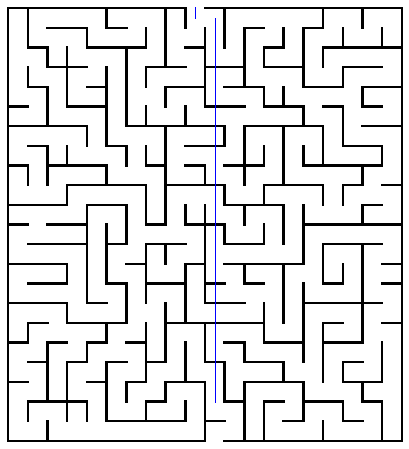

In [209]:
way_coords = find_way_from_maze(test_image)  # вычислить координаты пути через лабиринт
image_with_way = plot_maze_path(test_image, way_coords)

plot_one_image(image_with_way)